In [1]:
import LLMSR
import openai
import base64
import io
import copy

import numpy as np
import matplotlib.pyplot as plt
import torch.nn

from kan import *

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key="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",
)
LLMSR.llm.check_key_limit(client)

91.2616937

cpu
checkpoint directory created: ./model
saving model version 0.0


| train_loss: 4.12e-03 | test_loss: 4.33e-03 | reg: 1.36e+01 | : 100%|█| 500/500 [01:04<00:00,  7.73


saving model version 0.1


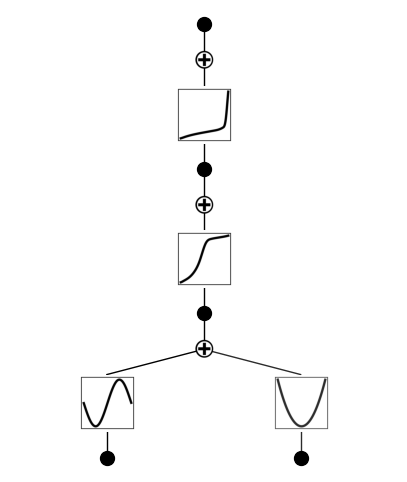

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# initialize KAN with G=3
model = KAN(width=[2,1,1,1], grid=7, k=3, seed=9223, device=device, symbolic_enabled=False)

# create dataset
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, train_num=10000, test_num=1000, device=device)
res = model.fit(dataset, opt="LBFGS", steps=500);
model.plot()

# fit KANs splines

(0, 0, 0)


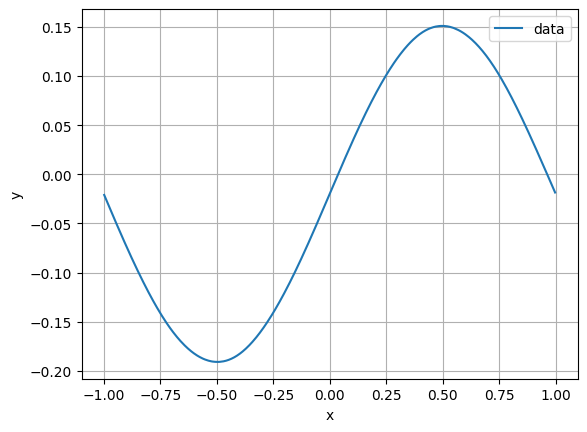

Checking constant function
Constant function is not a good fit.
Score:  -30.46658632082746
Constant:  [-0.02182232]
Generating Initial population population


100%|██████████| 10/10 [00:39<00:00,  3.92s/it]


Best score:  -5.102169967886183
Best ansatz:   params[0] * x
Best params:  [0.16289339]
Generation: 1


100%|██████████| 10/10 [00:30<00:00,  3.09s/it]


Best score:  -0.9423902454582344
Best ansatz:   params[0] * np.sin(params[1] * x) + params[2] * x
Best params:  [0.16056853 3.24872236 0.0218928 ]
Generation: 2


100%|██████████| 10/10 [00:46<00:00,  4.63s/it]

Best score:  -8.305210650518687e-06
Best ansatz:   params[0] * np.sin(params[1] * x) + params[2] * x + params[3]
Best params:  [ 1.70848122e-01  3.14364349e+00  4.76857249e-04 -2.00841670e-02]
Exit condition met.
(0, 1, 0)


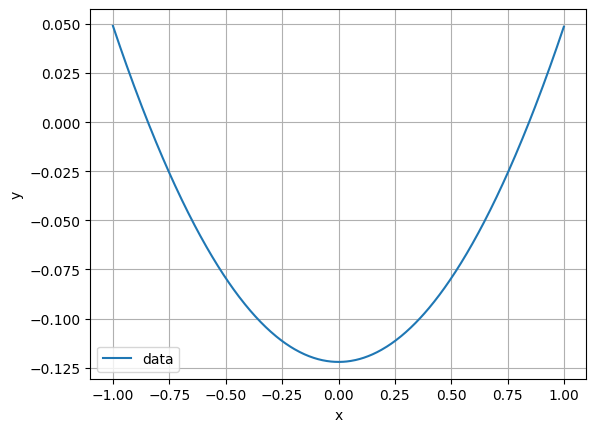

Checking constant function
Constant function is not a good fit.
Score:  -0.6594614616461417
Constant:  [-0.06359891]
Generating Initial population population


 50%|█████     | 5/10 [00:25<00:23,  4.73s/it]

unsupported operand type(s) for -: 'function' and 'float'


100%|██████████| 10/10 [00:48<00:00,  4.88s/it]

Best score:  -2.1064197004742162e-06
Best ansatz:   params[0] * x**2 + params[1]
Best params:  [ 0.17110814 -0.12210349]
Exit condition met.
(1, 0, 0)


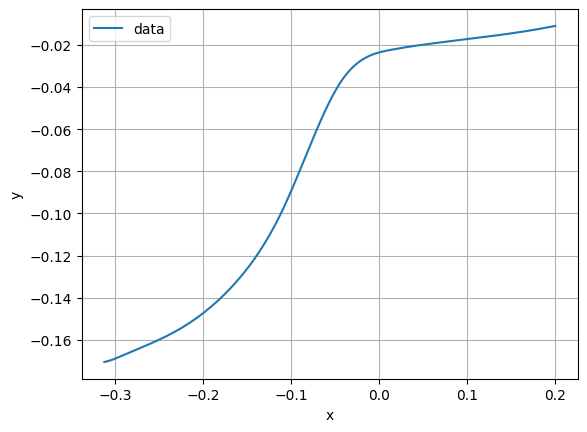

Checking constant function
Constant function is not a good fit.
Score:  -0.5204933689575792
Constant:  [-0.08308579]
Generating Initial population population


 90%|█████████ | 9/10 [00:24<00:03,  3.17s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


100%|██████████| 10/10 [00:26<00:00,  2.68s/it]


Best score:  -3.1725378231855874
Best ansatz:   params[0] + params[1] * x
Best params:  [-0.04550987  0.43988968]
Generation: 1


100%|██████████| 10/10 [00:34<00:00,  3.42s/it]


Optimal parameters not found: Number of calls to function has reached maxfev = 1000.
Best score:  -0.2197626898099341
Best ansatz:   params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3
Best params:  [-0.02972095  0.4558178  -1.73440444 -5.68650762]
Generation: 2


 90%|█████████ | 9/10 [00:39<00:03,  3.83s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 1200.


100%|██████████| 10/10 [00:42<00:00,  4.24s/it]

Best score:  -0.029445384132142025
Best ansatz:   params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3 + params[4] * x**4
Best params:  [-0.02849031  0.36124906 -2.08107894 -1.16235348 16.08582923]
(2, 0, 0)


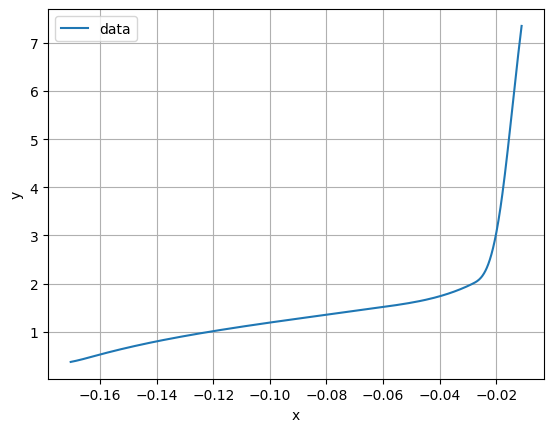

Checking constant function
Constant function is not a good fit.
Score:  -0.5714557713755964
Constant:  [1.84721411]
Generating Initial population population


100%|██████████| 10/10 [00:31<00:00,  3.18s/it]


Best score:  -0.005879913554819993
Best ansatz:   params[0] + params[1] * x + params[2] * np.exp(params[3] * x)
Best params:  [  2.00439602   8.93201771  49.6591675  183.06750976]
Generation: 1


 50%|█████     | 5/10 [00:18<00:16,  3.27s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


 60%|██████    | 6/10 [00:21<00:12,  3.08s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


 70%|███████   | 7/10 [00:23<00:08,  2.72s/it]

Optimal parameters not found: Number of calls to function has reached maxfev = 1000.


100%|██████████| 10/10 [00:46<00:00,  4.61s/it]

Best score:  -0.0010139439657780192
Best ansatz:   params[0] + params[1] * x + params[2] * np.exp(params[3] * x) + params[4] * x**2
Best params:  [  1.55686145  -1.81994601  42.08083482 165.59401543 -51.62576893]
Exit condition met.


In [4]:
sym_expr = LLMSR.kan_to_symbolic(model, client, gpt_model="openai/gpt-4o", exit_condition=min(res['train_loss']).item())

In [5]:
import pickle
with open('./sym_expr_4o.pkl', 'wb') as hnd:
    pickle.dump(sym_expr, hnd)

In [6]:
import pickle
with open('./sym_expr_4o.pkl', 'rb') as hnd:
    sym_expr = pickle.load(hnd)

In [7]:
initial_params = []
for kan_conn, sub_res in sym_expr[0].items():
    if sub_res is None:
        print(f"Could not fit a function for connection {kan_conn}")
        continue
    highest_score_element = max((item for sublist in sub_res for item in sublist), key=lambda item: item['score'])
    print(f"Approximation for {kan_conn}: {highest_score_element['ansatz'].strip()}")
    print(f"Parameters are {np.round(highest_score_element['params'], 1)}")
    initial_params += list(highest_score_element['params'])

Approximation for (0, 0, 0): params[0] * np.sin(params[1] * x) + params[2] * x + params[3]
Parameters are [ 0.2  3.1  0.  -0. ]
Approximation for (0, 1, 0): params[0] * x**2 + params[1]
Parameters are [ 0.2 -0.1]
Approximation for (1, 0, 0): params[0] + params[1] * x + params[2] * x**2 + params[3] * x**3 + params[4] * x**4
Parameters are [-0.   0.4 -2.1 -1.2 16.1]
Approximation for (2, 0, 0): params[0] + params[1] * x + params[2] * np.exp(params[3] * x) + params[4] * x**2
Parameters are [  1.6  -1.8  42.1 165.6 -51.6]


In [8]:
def learned_f(X, *params):
    x0, x1 = X
    l11, l12 = params[0] * np.sin(params[1] * x0 + params[2]) + params[3], params[4] * x1**2 + params[5] * x1 + params[6]
    l21 = params[7] * np.sin(params[8] * (l11+l12) + params[9]) + params[10]
    l31 = params[11] * np.exp(params[12] * l21) + params[13] * l21 + params[14]
    return l31

In [9]:
from scipy.optimize import curve_fit
initial_params = np.random.uniform(-1, 1, 15)
popt, _ = curve_fit(learned_f, (dataset['train_input'].cpu().detach().numpy()[:,0], dataset['train_input'].cpu().detach().numpy()[:,1]), dataset['train_label'].cpu().detach().numpy().flatten(), p0=initial_params, maxfev=100000)
popt

/var/folders/b6/m5qrk7z12lxb7lpygv99mnmw0000gn/T/ipykernel_24345/1459366936.py:5: RuntimeWarning: overflow encountered in exp
  l31 = params[11] * np.exp(params[12] * l21) + params[13] * l21 + params[14]


array([-23.32362201,  55.95447352,  53.29079198, -16.98973979,
       -36.82885728,  -1.38436046, -16.47997591,   0.19418254,
         3.86778638,  -3.98825936,   0.91479589,   0.08731337,
         2.26311258,  -1.22760342,   2.24614271])